<a href="https://colab.research.google.com/github/DavoodSZ1993/Dive_into_Deep_Learning/blob/main/07_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7 Convolutional Neural Networks

## 7.2 Convolutions for Images



### 7.2.1 The Cross-Correlation Operation

In [2]:
!pip install d2l==1.0.0-alpha1.post0 --quiet

In [ ]:
import torch
from torch import nn
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
def corr2d(X, K):
  h, w = K.shape
  Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
  
  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      Y[i, j] = (X[i:i + h, j:j + w] * K).sum()

  return Y

In [ ]:
X = torch.tensor([[0.0, 1.0, 2.0],
                  [3.0, 4.0, 5.0],
                  [6.0, 7.0, 8.0]])
K = torch.tensor([[0.0, 1.0],
                  [2.0, 3.0]])

corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

### 7.2.2 Convolutional Layers

In [ ]:
class Conv2D(nn.Module):
  def __init__(self, kernel_size):
    super().__init__()

    self.weight = nn.Parameter(torch.rand(kernel_size))
    self.bias = nn.Parameter(torch.zeros(1))

  def forward(self, X):
    return corr2d(X, self.weight) + self.bias

### 7.2.3 Object Edge Detection in Images

In [ ]:
X = torch.ones((6, 8))
X[:, 2:6] = 0
X, X.shape

(tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.],
         [1., 1., 0., 0., 0., 0., 1., 1.]]), torch.Size([6, 8]))

In [ ]:
K = torch.tensor([[1.0, -1.0]])
K.shape

torch.Size([1, 2])

In [ ]:
Y = corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [ ]:
corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

### 7.2.4 Learning a Kernel

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(1, 2), bias=False)

X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))

lr = 3e-2 # Learning rate
num_epochs = 10

for i in range(num_epochs):
  Y_hat = conv2d(X)
  l = (Y_hat - Y) ** 2
  conv2d.zero_grad()
  l.sum().backward()

  # Update the kernel
  conv2d.weight.data[:] -= lr * conv2d.weight.grad

  if (i + 1) % 2 == 0:                                    # % is modulus operator in python 
    print(f'epoch {i + 1}, loss {l.sum(): .3f}')

epoch 2, loss  9.068
epoch 4, loss  3.089
epoch 6, loss  1.160
epoch 8, loss  0.458
epoch 10, loss  0.185


In [ ]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 1.0358, -0.9475]])

## 7.3 Padding and Stride

### 7.3.1 Padding

In [ ]:
import torch
from torch import nn

In [ ]:
def comp_conv2d(conv2d, X):
  
  X = X.reshape((1, 1) + X.shape)
  Y = conv2d(X)

  return Y.reshape(Y.shape[2:])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))

comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(5, 3), padding=(2, 1))

comp_conv2d(conv2d, X).shape

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([8, 8])

### 7.3.2 Stride

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=3, padding=1, stride=2)

comp_conv2d(conv2d, X).shape

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([4, 4])

In [ ]:
conv2d = nn.LazyConv2d(1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

comp_conv2d(conv2d, X).shape

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


torch.Size([2, 2])

## 7.4 Multiple Input and Multiple Output Channels

### 7.4.1 Multiple Input Channels

In [2]:
import torch
from d2l import torch as d2l

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [7]:
def corr2d_multi_in(X, K):
  return sum(d2l.corr2d(x, k) for x, k in zip(X, K))  # loop of the channles

In [8]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
                  [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]]) # 2 (channels) x 3(Height) x 3(width)
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])  # 2 (channels) x 2 (height) x 2 (width)

X.shape, K.shape

(torch.Size([2, 3, 3]), torch.Size([2, 2, 2]))

In [9]:
corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

### 7.4.2 Multiple Output Channels

In [10]:
def corr2d_multi_in_out(X, K):
  return torch.stack([corr2d_multi_in(X, k) for k in K], 0)

In [11]:
K = torch.stack((K, K, K), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [12]:
corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 56.,  72.],
         [104., 120.]],

        [[ 56.,  72.],
         [104., 120.]]])

In [13]:
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]]) 
K = torch.stack((K, K + 1, K + 2), 0)

corr2d_multi_in_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

### 7.4.3 1 $\times$ 1 Convolutional Layer

In [14]:
def corr2d_multi_in_out_1x1(X, K):
  c_i, h, w = X.shape
  c_o = K.shape[0]
  X = X.reshape((c_i, h*w))
  K = K.reshape((c_o, c_i))

  Y = torch.matmul(K, X)
  return Y.reshape((c_o, h, w))

In [16]:
X = torch.normal(0, 1, (3, 3, 3))
K = torch.normal(0, 1, (2, 3, 1, 1))

In [17]:
Y1 = corr2d_multi_in_out_1x1(X, K)
Y2 = corr2d_multi_in_out(X, K)

assert float(torch.abs(Y1 - Y2).sum()) < 1e-6

## 7.5 Pooling

### 7.5.1 Maximum Pooling and Average pooling

In [23]:
import torch
from torch import nn
from d2l import torch as d2l

In [24]:
def pool2d(X, pool_size, mode='max'):
  
  p_h, p_w = pool_size
  Y = torch.zeros((X.shape[0] - p_h + 1, X.shape[1] - p_w + 1))  # same as convolution

  for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
      if mode == 'max':
        Y[i, j] = X[i: i + p_h, j:j + p_w].max()
      elif mode == 'mean':
        Y[i, j] = X[i: i + p_h, j: j + p_w].mean()

  return Y

In [25]:
X = torch.tensor([[0.0, 1.0, 2.0],
                  [3.0, 4.0, 5.0],
                  [6.0, 7.0, 8.0]])
pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [26]:
pool2d(X, (2, 2), mode='mean')

tensor([[2., 3.],
        [5., 6.]])

### 7.5.2 Padding and Stride

In [27]:
X = torch.arange(16, dtype=torch.float32).reshape((1, 1, 4, 4)) # batch x channels x Height x Width

X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [28]:
pool2d = nn.MaxPool2d(3)

pool2d(X)

tensor([[[[10.]]]])

In [29]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

In [30]:
pool2d = nn.MaxPool2d((2, 3), stride=(2, 3), padding=(0, 1))
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]]]])

### 7.5.3 Multiple Channels

In [31]:
X = torch.cat((X, X + 1), 1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [32]:
pool2d = nn.MaxPool2d(3, padding=1, stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

## 7.6 Convolutional neural Networks (LeNet)

### 7.6.1 LeNet

In [3]:
import torch
from torch import nn
from d2l import torch as d2l

In [4]:
def init_cnn(module):
  if type(module) == nn.Linear or type(module) == nn.Conv2d:
    nn.init.xavier_uniform_(module.weight)

In [5]:
class LeNet(d2l.Classifier):
  def __init__(self, lr=0.1, num_classes=10):
    super().__init__()
    self.save_hyperparameters()

    self.net = nn.Sequential(
        nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
        nn.AvgPool2d(kernel_size=2, stride=2),
        nn.Flatten(),
        nn.LazyLinear(120), nn.Sigmoid(),
        nn.LazyLinear(84), nn.Sigmoid(),
        nn.LazyLinear(num_classes))

In [6]:
@d2l.add_to_class(d2l.Classifier)
def layer_summary(self, X_shape):
  X = torch.randn(*X_shape)

  for layer in self.net:
    X = layer(X)
    print(layer.__class__.__name__, 'outputshape:\t', X.shape)

In [7]:
model = LeNet()
model.layer_summary((1, 1, 28, 28))

Conv2d outputshape:	 torch.Size([1, 6, 28, 28])
Sigmoid outputshape:	 torch.Size([1, 6, 28, 28])
AvgPool2d outputshape:	 torch.Size([1, 6, 14, 14])
Conv2d outputshape:	 torch.Size([1, 16, 10, 10])
Sigmoid outputshape:	 torch.Size([1, 16, 10, 10])
AvgPool2d outputshape:	 torch.Size([1, 16, 5, 5])
Flatten outputshape:	 torch.Size([1, 400])
Linear outputshape:	 torch.Size([1, 120])
Sigmoid outputshape:	 torch.Size([1, 120])
Linear outputshape:	 torch.Size([1, 84])
Sigmoid outputshape:	 torch.Size([1, 84])
Linear outputshape:	 torch.Size([1, 10])


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


### 7.6.2 Training

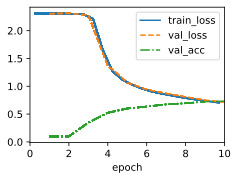

In [8]:
trainer = d2l.Trainer(max_epochs = 10, num_gpus=1)
data = d2l.FashionMNIST(batch_size=128)
model = LeNet(lr=0.1)
model.apply_init([next(iter(data.get_dataloader(True)))[0]], init_cnn)
trainer.fit(model, data)